In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r"/content/who_suicide_statistics.csv")

In [4]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [5]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [6]:
df.shape

(43776, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [8]:
df = df.dropna()

In [ ]:
df.shape

In [27]:
df.groupby("year")["suicides_no"].sum().sort_values(ascending = False) #artan yıllara göre bir değişim yok yıllar bir anlam taşımıyor.

year
2002    259376.0
2003    259336.0
1999    258989.0
2000    258808.0
2001    254036.0
1998    252324.0
1996    249451.0
2009    246323.0
1995    245203.0
2004    244196.0
1997    243263.0
2010    241523.0
1994    239869.0
2011    239048.0
2008    238239.0
2005    237556.0
2006    236400.0
2007    236179.0
2012    232834.0
1993    228951.0
2013    228340.0
2014    227235.0
1992    218446.0
2015    207627.0
1991    204236.0
1990    204043.0
1985    197115.0
1986    188684.0
1987    185757.0
1989    185356.0
1982    182435.0
1988    180726.0
1981    177705.0
1980    153400.0
1984    124264.0
1983    122166.0
1979     92790.0
2016     16238.0
Name: suicides_no, dtype: float64

In [29]:
df = df[df["year"] == 2002]

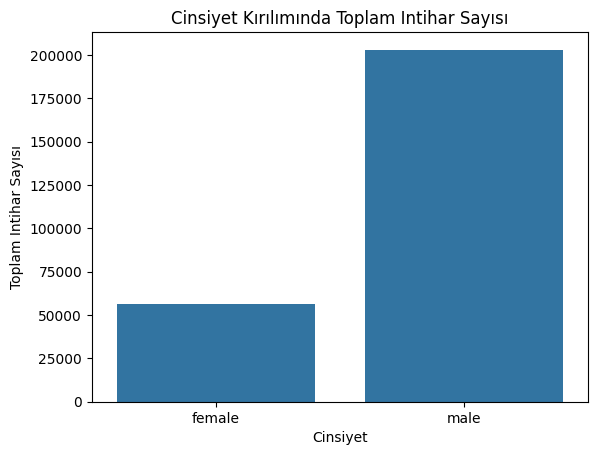

In [30]:
suicides_by_sex = df.groupby('sex')['suicides_no'].sum().reset_index()


sns.barplot(x='sex', y='suicides_no', data=suicides_by_sex)
# Y ekseni etiketlerini milyonlar formatında ayarla
plt.ticklabel_format(style='plain', axis='y')
plt.title('Cinsiyet Kırılımında Toplam Intihar Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Toplam Intihar Sayısı')
plt.show()

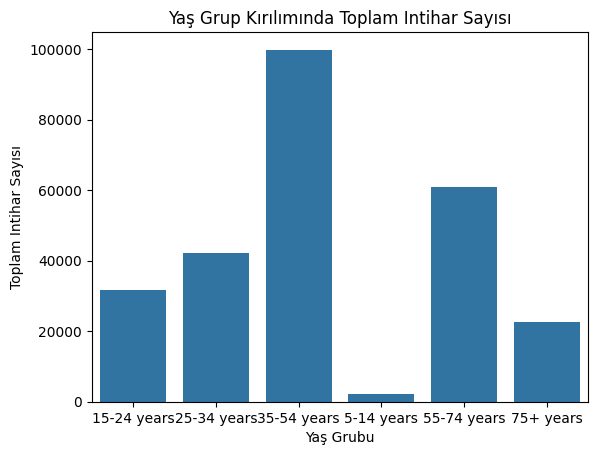

In [31]:
suicides_by_age = df.groupby('age')['suicides_no'].sum().reset_index()


sns.barplot(x='age', y='suicides_no', data=suicides_by_age)
# Y ekseni etiketlerini milyonlar formatında ayarla
plt.ticklabel_format(style='plain', axis='y')
plt.title('Yaş Grup Kırılımında Toplam Intihar Sayısı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Toplam Intihar Sayısı')
plt.show()

In [32]:
df.head()

,country,year,sex,age,suicides_no,population
204,Albania,2002,female,15-24 years,14.0,275970.0
205,Albania,2002,female,25-34 years,7.0,223685.0
206,Albania,2002,female,35-54 years,15.0,375113.0
207,Albania,2002,female,5-14 years,1.0,304850.0
208,Albania,2002,female,55-74 years,4.0,191712.0


In [33]:
 df_country = df.groupby(['country'])['suicides_no'].sum().reset_index()

In [34]:
df_country.sort_values(by='suicides_no', ascending=False)


,country,suicides_no
72,Russian Federation,55024.0
92,United States of America,31645.0
46,Japan,29715.0
90,Ukraine,12536.0
33,Germany,11176.0
...,...,...
15,Brunei Darussalam,1.0
10,Barbados,0.0
1,Antigua and Barbuda,0.0
58,Montenegro,0.0


In [69]:
df_copy = df.copy()

In [70]:
# Ülkelere göre gruplayıp toplam intihar sayısı ve toplam nüfusu hesapla
country_stats = df_copy.groupby('country').agg({'suicides_no': 'sum', 'population': 'sum'})

# Intihar oranını hesapla
country_stats['suicides_no_ratio'] = country_stats['suicides_no'] / country_stats['population']

# Yeni DataFrame'i oluştur
new_df = country_stats.reset_index()

In [71]:
new_df.sort_values(by = "suicides_no",ascending  =  False)

,country,suicides_no,population,suicides_no_ratio
72,Russian Federation,55024.0,136590900.0,0.000403
92,United States of America,31645.0,268759559.0,0.000118
46,Japan,29715.0,120189000.0,0.000247
90,Ukraine,12536.0,46060017.0,0.000272
33,Germany,11176.0,78633771.0,0.000142
...,...,...,...,...
15,Brunei Darussalam,1.0,303100.0,0.000003
10,Barbados,0.0,253353.0,0.000000
1,Antigua and Barbuda,0.0,77588.0,0.000000
58,Montenegro,0.0,578668.0,0.000000


In [74]:
# yaş gruplarına göre
age_stats = df_copy.groupby('age').agg({'suicides_no': 'sum', 'population': 'sum'})
# Intihar oranını hesapla
age_stats['suicides_no_ratio'] = age_stats['suicides_no'] / age_stats['population']

# Yeni DataFrame'i oluştur
new_data = age_stats.reset_index()

In [75]:
new_data.sort_values(by = "suicides_no_ratio",ascending = False)

,age,suicides_no,population,suicides_no_ratio
5,75+ years,22630.0,94449918.0,0.000240
4,55-74 years,60900.0,308522860.0,0.000197
2,35-54 years,99877.0,549114878.0,0.000182
1,25-34 years,42202.0,312865443.0,0.000135
0,15-24 years,31625.0,331746860.0,0.000095
3,5-14 years,2142.0,325886915.0,0.000007


In [79]:
# cinsiyet gruplarına göre
sex_stats = df_copy.groupby('sex').agg({'suicides_no': 'sum', 'population': 'sum'})
# Intihar oranını hesapla
sex_stats['suicides_no_ratio'] = sex_stats['suicides_no'] / sex_stats['population']

# Yeni DataFrame'i oluştur
new_data = sex_stats.reset_index()

In [83]:
new_data

,sex,suicides_no,population,suicides_no_ratio
0,female,56327.0,983609024.0,0.000057
1,male,203049.0,938977850.0,0.000216
